PCovR-Inspired Feature Selection 
==============================

In [1]:
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler

from matplotlib import pyplot as plt
from matplotlib import cm

from tqdm.notebook import tqdm

import numpy as np

from skcosmo.feature_selection import PCovCUR, PCovFPS, CUR, FPS
from skcosmo.datasets import load_csd_1000r
from skcosmo.preprocessing import StandardFlexibleScaler

cmap = cm.brg

For this, we will use the provided csd dataset, which has 100 features to select from.

In [2]:
X, y = load_csd_1000r(return_X_y=True)
X = StandardFlexibleScaler(column_wise=False).fit_transform(X)
y = StandardScaler().fit_transform(y.reshape(X.shape[0], -1))

In [3]:
n = X.shape[-1]//2
lr = RidgeCV(cv=2, alphas=np.logspace(-10,1), fit_intercept=False)

## Feature Selection with CUR + PCovR
First, let's demonstrate CUR feature selection, and show the ten features chosen with a mixing parameter of 0.0, 0.5, and 1.0 perform.

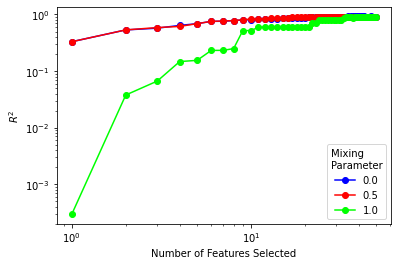

In [4]:
for m in np.arange(0, 1.01, 0.5, dtype=np.float32):

    if m < 1.0:
        idx = PCovCUR(mixing=m, n_to_select=n).fit(X, y).selected_idx_
    else:
        idx = CUR(n_to_select=n).fit(X, y).selected_idx_

    plt.loglog(
        range(1, n + 1),
        np.array(
            [
                lr.fit(X[:, idx[: ni + 1]], y).score(X[:, idx[: ni + 1]], y)
                for ni in range(n)
            ]
        ),
        label=m,
        c=cmap(m),
        marker="o",
    )

plt.xlabel("Number of Features Selected")
plt.ylabel(r"$R^2$")
plt.legend(title="Mixing \nParameter")
plt.show()

### Non-iterative feature selection with CUR + PCovR
Computing a non-iterative CUR is more efficient, although can result in poorer performance for larger datasets. you can also use a greater number of eigenvectors to compute the feature importance by varying `k`, but `k` should not exceed the number of targets, for optimal results.

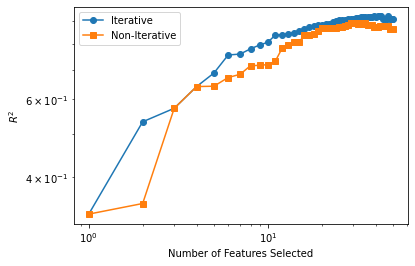

In [5]:
m = 0.0


idx = PCovCUR(mixing=m, n_to_select=n).fit(X, y).selected_idx_
idx_non_it = PCovCUR(mixing=m, iterative=False, n_to_select=n).fit(X, y).selected_idx_

plt.loglog(
    range(1, n + 1),
    np.array(
        [
            lr.fit(X[:, idx[: ni + 1]], y).score(X[:, idx[: ni + 1]], y)
            for ni in range(n)
        ]
    ),
    label='Iterative',
    marker="o",
)
plt.loglog(
    range(1, n + 1),
    np.array(
        [
            lr.fit(X[:, idx_non_it[: ni + 1]], y).score(X[:, idx_non_it[: ni + 1]], y)
            for ni in range(n)
        ]
    ),
    label='Non-Iterative',
    marker="s",
)

plt.xlabel("Number of Features Selected")
plt.ylabel(r"$R^2$")
plt.legend()
plt.show()

## Feature Selection with FPS + PCovR
Next, let's look at FPS. We'll choose the first index from CUR at m = 0, which is 46.

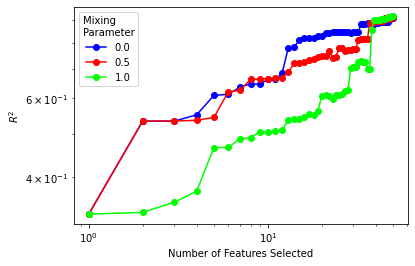

In [6]:
for m in np.arange(0, 1.01, 0.5, dtype=np.float32):

    if m < 1.0:
        idx = PCovFPS(mixing=m, n_to_select=n, initialize=46).fit(X, y).selected_idx_
    else:
        idx = FPS(n_to_select=n, initialize=46).fit(X, y).selected_idx_


    plt.loglog(
        range(1, n + 1),
        np.array(
            [
                lr.fit(X[:, idx[: ni + 1]], y).score(X[:, idx[: ni + 1]], y)
                for ni in range(n)
            ]
        ),
        label=m,
        c=cmap(m),
        marker="o",
    )

plt.xlabel("Number of Features Selected")
plt.ylabel(r"$R^2$")
plt.legend(title="Mixing \nParameter")
plt.show()